# Project 2: WeRateDogs

## Table of Content

- Introduction

- Gathering data

- Assessing data

- Cleaning data

- Storing data

- Analyzing, and visualizing data

- Reporting

- Limitations

- Reference

## Introduction

This project is focused on gathering data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. All wrangling effort was documented in a Jupyter Notebook, and showcased through analyses and visualizations using Python (and its libraries) and/or SQL. The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

WeRateDogs is a tweet archive of Twitter user @dog_rates, that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

WeRateDogs has over 4 million followers and has received international media coverage.

The three datasets worked on are as listed below:

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, tweets with ratings only (there are 2356) were filtered.

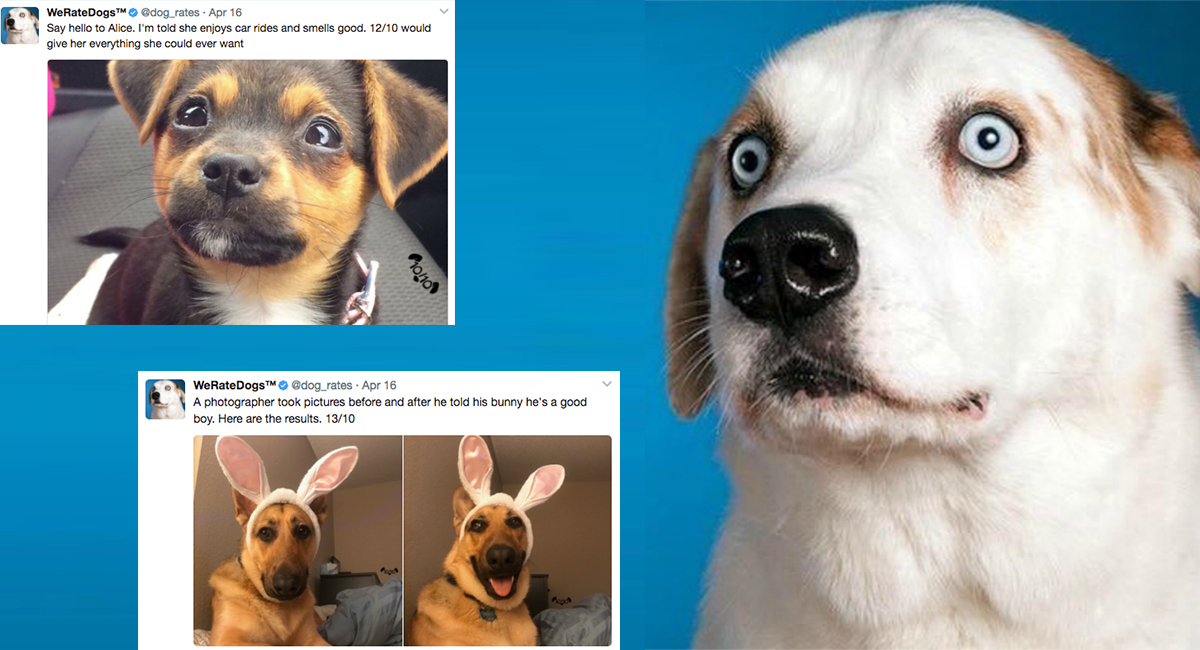
Fig 1: We Rate Dogs

During the extraction of the data data from each tweet's text, data was extracted programmatically, but lacked some key entities and incorrect values.

Here, I am expected to assess and clean these columns to enable me analyze and visualize them.

### Additional Data via the Twitter API

Retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by from Twitter's API. I was expected to query Twitter's API to gather this valuable data in order to gather this data. And join it with the WeRateDogs Twitter Archive data via the tweet ID, which will result to about 5000+ of this data.

However, I didn't gather the data via Twitter's API because of the time taken for twitter to approve my application. I used the json file provided.

### Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. This is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images), Image predictions
and Tweet image prediction data

Below is the description of the table:

- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.

## Libraries

The libraries used are listed below:

- Pandas
- Numpy
- requests
- tweepy
-json

In [3]:
## Importing Libraries

# requests and tweepy were installed using $ pip install requests and pip install tweepy respectively

import pandas as pd
import numpy as np
import requests
# import tweepy as t (this is for getting data through twitter's API)
import json as j
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering the Data

The data needed to answer the different questions were spread across three different data sets, which made data wrangling for this project pretty complicated. Data is dirty especially when it comes from different sources.

## Dataset 1: Twitter-Archive-Enhanced

In [4]:
#Reading.csv file after downloading the data from Udacity and uploaded it to jupyter notebook

twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
#To view the top 5 rows

twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#To view the top 5 rows

twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
# Checking programmatically for data errors

twitter.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [97]:
twitter.shape

(2356, 17)

In [34]:
#We have a total of 17 columns and 2356 rows of varyiing data types

twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
#Here is the number of values in each row

twitter.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

<AxesSubplot:>

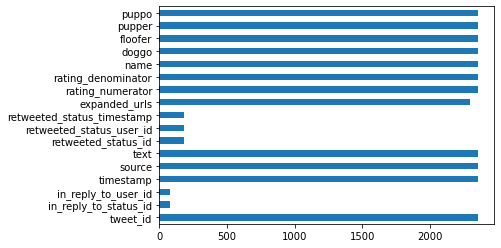

In [33]:
#Visualizing each role count

twitter.count().plot(kind = 'barh')

<AxesSubplot:>

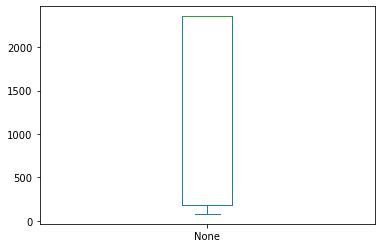

In [120]:
#checking for outliers

twitter.count().plot(kind = 'box')

In [37]:
#Checking out for the missing values in each column

twitter.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [123]:
#checking for columns without data

twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [98]:
#The statistics of each column

twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [363]:
twitter.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
271,841077006473256960,NaN,NaN,2017-03-13 00:02:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None


## Dataset 2: Image Predictions

In [100]:
#Gathering data from a url

import requests
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [99]:
response.status_code

200

In [101]:
#Saving the file

with open('image_predictions.tsv','wb') as wb:
    wb.write(response.content)

In [102]:
image_df = pd.read_csv('image_predictions.tsv',sep = '\t')

In [103]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [104]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [105]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [108]:
#To get the different columns
image_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [45]:
image_df.shape

(2075, 12)

In [110]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<AxesSubplot:>

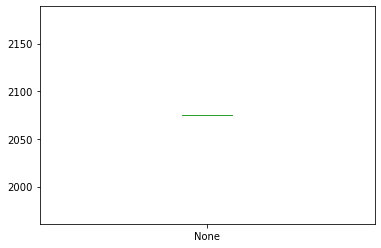

In [118]:
#Checking for outliers

image_df.count().plot(kind='box')

## Dataset 3: Tweet_Json.txt

In [112]:
lines = []

with open('tweet-json.txt') as f:
    lines = f.readlines()
    print(lines)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [113]:
with open('tweet-json.txt', encoding='utf8') as f:
    for line in f:
        data = line.strip()
        print(data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [114]:
#Creating empty list of the data downloaded

import json

df_list = []

#Opening .txt file for reading

with open('tweet-json.txt', 'r', encoding = 'utf-8') as f:
    for line in f.readlines():
        
        #reading json string into dictionary
        
        tweet = json.loads(line)
        
        #providing the required parameters
        
        tweet_ID = tweet['id']
        retweet_count = tweet['retweet_count']
        friends_count = tweet['user']['friends_count']
        fav_count = tweet['favorite_count']
        followers_count = tweet['user']['followers_count']
        listed_count = tweet['user']['listed_count']
                                     
        #appending to the list of dictionaries
        
        df_list.append({'id':tweet_ID,
                       'retweet_count':retweet_count,
                       'friends_count':friends_count,
                       'favorite_count':fav_count,
                       'followers_count':followers_count,
                       'listed_count':listed_count})
        pd.DataFrame(df_list)

In [115]:
tweet_json = pd.DataFrame(df_list)
tweet_json

,id,retweet_count,friends_count,favorite_count,followers_count,listed_count
0,892420643555336193,8853,104,39467,3200889,2784
1,892177421306343426,6514,104,33819,3200889,2784
2,891815181378084864,4328,104,25461,3200889,2784
3,891689557279858688,8964,104,42908,3200889,2784
4,891327558926688256,9774,104,41048,3200889,2784
...,...,...,...,...,...,...
2349,666049248165822465,41,104,111,3201018,2812
2350,666044226329800704,147,104,311,3201018,2812
2351,666033412701032449,47,104,128,3201018,2812
2352,666029285002620928,48,104,132,3201018,2812


In [246]:
#Renaming the title 'id' to 'tweet_id' so I can merge it with other tables

tweet_json.rename(columns={'id' : 'tweet_id'}, inplace=True)

In [247]:
tweet_json.head()

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count
0,892420643555336193,8853,104,39467,3200889,2784
1,892177421306343426,6514,104,33819,3200889,2784
2,891815181378084864,4328,104,25461,3200889,2784
3,891689557279858688,8964,104,42908,3200889,2784
4,891327558926688256,9774,104,41048,3200889,2784


In [248]:
tweet_json.tail()

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count
2349,666049248165822465,41,104,111,3201018,2812
2350,666044226329800704,147,104,311,3201018,2812
2351,666033412701032449,47,104,128,3201018,2812
2352,666029285002620928,48,104,132,3201018,2812
2353,666020888022790149,532,104,2535,3201018,2812


In [79]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   friends_count    2354 non-null   int64
 3   favorite_count   2354 non-null   int64
 4   followers_count  2354 non-null   int64
 5   listed_count     2354 non-null   int64
dtypes: int64(6)
memory usage: 110.5 KB


In [343]:
tweet_json.shape

(2354, 6)

In [80]:
tweet_json.describe()

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count
count,2.354000e+03,2354.000000,2354.0,2354.000000,2.354000e+03,2354.000000
mean,7.426978e+17,3164.797366,104.0,8080.968564,3.200942e+06,2799.480884
std,6.852812e+16,5284.770364,0.0,11814.771334,4.457302e+01,11.178223
min,6.660209e+17,0.000000,104.0,0.000000,3.200799e+06,2724.000000
25%,6.783975e+17,624.500000,104.0,1415.000000,3.200898e+06,2788.000000
50%,7.194596e+17,1473.500000,104.0,3603.500000,3.200945e+06,2803.000000
75%,7.993058e+17,3652.000000,104.0,10122.250000,3.200953e+06,2805.000000
max,8.924206e+17,79515.000000,104.0,132810.000000,3.201018e+06,2846.000000


## Data Tidiness Issues

- The title of the heading for the tweet_id column in the tweet_json dataset is 'id' while others is 'tweet_id'. This won't enable us join the datasets.
- Poor representation of data values. In column 'puppo', 'poppo', etc there is 'none'instead of 'nan'which could be as a result of no data validation during data capturing
- The denominator rating which is supposed to be 10 is not consistent and therefore, could lead to biased analysis
- Poor or insufficient or unclear column title description. For example, p2_conf, img_num, etc
- Some data are inaccurate some tweets where just retweeted and not actual tweets
- Erroneous Datatype for Datetime column in tweet_archive_enhanced dataset
- I observed that the data is incomplete and we need to source for the complete data, join the tables and have a consolidated table

## Data Issues

- 4 Columns('doggo','floofer', 'pupper', 'puppo') need to be collapsed to 1 as they are same information
- We have columns with no values or data. This is an incomplete data issue

## Assessing and Cleaning the Data

After assessing the data, I wrote all of the required cleaning code to fix the issues stated above. With the cleaned data, I was able to perform the key calculation, create the visualizations and write the article.

In [244]:
#creating a copy of the twitter dataset

twitter_archive_master = twitter.copy()

twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [223]:
#cleaning the dataset

twitter_archive_master['puppo'].replace(to_replace = 'None', value = np.nan, inplace = True)
twitter_archive_master['puppo']

twitter_archive_master['floofer'].replace(to_replace = 'None', value = np.nan, inplace = True)

twitter_archive_master['doggo'].replace(to_replace = 'None', value = np.nan, inplace = True)

twitter_archive_master['pupper'].replace(to_replace = 'None', value = np.nan, inplace = True)

#checking for the change

twitter_archive_master['puppo']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: puppo, Length: 2356, dtype: object

In [301]:
#Adjusting the rating_denominator to

a = twitter_archive_master['rating_denominator']
twitter_archive_master.loc[(twitter_archive_master.rating_denominator > 0), 'rating_denominator'] = 10

In [302]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [303]:
#dropping unwanted columns

twitter_archive_master.drop(twitter_archive_master.columns[[3,4,7,8]], axis = 1, inplace = True)
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [304]:
#Saving the cleaned data: twittwer_archive_master in csv format

with open('twittwer_archive_master.csv','wb') as wb:
    wb.write(response.content)

In [305]:
#creating a copy of image_df

image_df_master = image_df.copy()
image_df_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [306]:
#Renaming Index

image_df_master.rename(columns = {'p1': 'First_Prediction', 'p1_conf': 'First_Prediction_Confident', 'p2' : 'Second_Prediction', 'p2_conf' : 'Second_Prediction_Confident', 'p3':'Third_Prediction', 'p3_conf': 'Third_Prediction_Confident', 'p1_dog' : 'First_Prediction_dog', 'p2_dog' : 'Second_Prediction_dog', 'p3_dog' : 'Third_Prediction_dog'},inplace=True)
image_df_master.head()
                               

,tweet_id,jpg_url,img_num,First_Prediction,First_Prediction_Confident,First_Prediction_dog,Second_Prediction,Second_Prediction_Confident,Second_Prediction_dog,Third_Prediction,Third_Prediction_Confident,Third_Prediction_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [307]:
#Merging all datasets function

from functools import reduce

def merge_datasets(data, col):
    merged_datasets = reduce(lambda left, right: pd.merge(left, right, on = col, how = 'outer'), data)
    return merged_datasets

In [308]:
#Creating a Dataframe

dataframes = [tweet_json, twitter_archive_master, image_df_master]
dataframes

[                tweet_id  retweet_count  friends_count  favorite_count  \
 0     892420643555336193           8853            104           39467   
 1     892177421306343426           6514            104           33819   
 2     891815181378084864           4328            104           25461   
 3     891689557279858688           8964            104           42908   
 4     891327558926688256           9774            104           41048   
 ...                  ...            ...            ...             ...   
 2349  666049248165822465             41            104             111   
 2350  666044226329800704            147            104             311   
 2351  666033412701032449             47            104             128   
 2352  666029285002620928             48            104             132   
 2353  666020888022790149            532            104            2535   
 
       followers_count  listed_count  
 0             3200889          2784  
 1             32008

In [309]:
# Merging the datasets

WeRateDogs_Master_df = merge_datasets(dataframes, 'tweet_id')
print(WeRateDogs_Master_df)

                tweet_id  retweet_count  friends_count  favorite_count  \
0     892420643555336193         8853.0          104.0         39467.0   
1     892177421306343426         6514.0          104.0         33819.0   
2     891815181378084864         4328.0          104.0         25461.0   
3     891689557279858688         8964.0          104.0         42908.0   
4     891327558926688256         9774.0          104.0         41048.0   
...                  ...            ...            ...             ...   
2351  666033412701032449           47.0          104.0           128.0   
2352  666029285002620928           48.0          104.0           132.0   
2353  666020888022790149          532.0          104.0          2535.0   
2354  888202515573088257            NaN            NaN             NaN   
2355  771004394259247104            NaN            NaN             NaN   

      followers_count  listed_count  in_reply_to_status_id  \
0           3200889.0        2784.0              

In [310]:
#We have a total of 2356 rows and 33 columns

WeRateDogs_Master_df.shape

(2356, 29)

In [311]:
#Getting the table information

WeRateDogs_Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tweet_id                     2356 non-null   int64  
 1   retweet_count                2354 non-null   float64
 2   friends_count                2354 non-null   float64
 3   favorite_count               2354 non-null   float64
 4   followers_count              2354 non-null   float64
 5   listed_count                 2354 non-null   float64
 6   in_reply_to_status_id        78 non-null     float64
 7   in_reply_to_user_id          78 non-null     float64
 8   text                         2356 non-null   object 
 9   retweeted_status_id          181 non-null    float64
 10  expanded_urls                2297 non-null   object 
 11  rating_numerator             2356 non-null   int64  
 12  rating_denominator           2356 non-null   int64  
 13  name              

In [312]:
#The statistics of each column

WeRateDogs_Master_df.describe()

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,rating_numerator,rating_denominator,img_num,First_Prediction_Confident,Second_Prediction_Confident,Third_Prediction_Confident
count,2.356000e+03,2354.000000,2354.0,2354.000000,2.354000e+03,2354.000000,7.800000e+01,7.800000e+01,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.427716e+17,3164.797366,104.0,8080.968564,3.200942e+06,2799.480884,7.455079e+17,2.014171e+16,7.720400e+17,13.126486,9.995756,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.856705e+16,5284.770364,0.0,11814.771334,4.457302e+01,11.178223,7.582492e+16,1.252797e+17,6.236928e+16,45.876648,0.206021,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,0.000000,104.0,0.000000,3.200799e+06,2724.000000,6.658147e+17,1.185634e+07,6.661041e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783989e+17,624.500000,104.0,1415.000000,3.200898e+06,2788.000000,6.757419e+17,3.086374e+08,7.186315e+17,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.196279e+17,1473.500000,104.0,3603.500000,3.200945e+06,2803.000000,7.038708e+17,4.196984e+09,7.804657e+17,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.993373e+17,3652.000000,104.0,10122.250000,3.200953e+06,2805.000000,8.257804e+17,4.196984e+09,8.203146e+17,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,79515.000000,104.0,132810.000000,3.201018e+06,2846.000000,8.862664e+17,8.405479e+17,8.874740e+17,1776.000000,10.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [313]:
#checking for columns without data

WeRateDogs_Master_df.isnull().sum()

tweet_id                          0
retweet_count                     2
friends_count                     2
favorite_count                    2
followers_count                   2
listed_count                      2
in_reply_to_status_id          2278
in_reply_to_user_id            2278
text                              0
retweeted_status_id            2175
expanded_urls                    59
rating_numerator                  0
rating_denominator                0
name                              0
doggo                             0
floofer                           0
pupper                            0
puppo                             0
jpg_url                         281
img_num                         281
First_Prediction                281
First_Prediction_Confident      281
First_Prediction_dog            281
Second_Prediction               281
Second_Prediction_Confident     281
Second_Prediction_dog           281
Third_Prediction                281
Third_Prediction_Confident  

In [314]:
#Dropping unwanted columns

WeRateDogs_Master_df.drop(WeRateDogs_Master_df.columns[[6,7,11,12,13]], axis = 1, inplace = True)
WeRateDogs_Master_df.head()

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count,text,retweeted_status_id,expanded_urls,doggo,...,img_num,First_Prediction,First_Prediction_Confident,First_Prediction_dog,Second_Prediction,Second_Prediction_Confident,Second_Prediction_dog,Third_Prediction,Third_Prediction_Confident,Third_Prediction_dog
0,892420643555336193,8853.0,104.0,39467.0,3200889.0,2784.0,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514.0,104.0,33819.0,3200889.0,2784.0,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4328.0,104.0,25461.0,3200889.0,2784.0,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8964.0,104.0,42908.0,3200889.0,2784.0,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9774.0,104.0,41048.0,3200889.0,2784.0,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [315]:
#Identifying duplicates

WeRateDogs_Master_df.duplicated().sum()

0

In [316]:
WeRateDogs_Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tweet_id                     2356 non-null   int64  
 1   retweet_count                2354 non-null   float64
 2   friends_count                2354 non-null   float64
 3   favorite_count               2354 non-null   float64
 4   followers_count              2354 non-null   float64
 5   listed_count                 2354 non-null   float64
 6   text                         2356 non-null   object 
 7   retweeted_status_id          181 non-null    float64
 8   expanded_urls                2297 non-null   object 
 9   doggo                        2356 non-null   object 
 10  floofer                      2356 non-null   object 
 11  pupper                       2356 non-null   object 
 12  puppo                        2356 non-null   object 
 13  jpg_url           

In [317]:
#Saving the dataset: WeRateDogs_Master_df

with open('WeRateDogs_Master_df.csv','wb') as wb:
    wb.write(response.content)

In [318]:
#Reading the saved file

pd.read_csv('WeRateDogs_Master_df.csv', '\t')

C:\Users\maxdr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [357]:
WeRateDogs_Master_df.sample()

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count,text,retweeted_status_id,expanded_urls,doggo,...,img_num,First_Prediction,First_Prediction_Confident,First_Prediction_dog,Second_Prediction,Second_Prediction_Confident,Second_Prediction_dog,Third_Prediction,Third_Prediction_Confident,Third_Prediction_dog
793,773336787167145985,5912.0,104.0,0.0,3200904.0,2789.0,RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,https://twitter.com/dog_rates/status/771380798...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
result = WeRateDogs_Master_df.dropna()
result

,tweet_id,retweet_count,friends_count,favorite_count,followers_count,listed_count,text,retweeted_status_id,expanded_urls,doggo,...,img_num,First_Prediction,First_Prediction_Confident,First_Prediction_dog,Second_Prediction,Second_Prediction_Confident,Second_Prediction_dog,Third_Prediction,Third_Prediction_Confident,Third_Prediction_dog
35,885311592912609280,19297.0,104.0,0.0,3200890.0,2784.0,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,https://twitter.com/dog_rates/status/830583320...,None,...,1.0,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
77,877611172832227328,83.0,104.0,0.0,3200892.0,2785.0,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,https://twitter.com/rachel2195/status/87685077...,None,...,1.0,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
94,873697596434513921,12518.0,104.0,0.0,3200891.0,2786.0,RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,https://twitter.com/dog_rates/status/868880397...,None,...,1.0,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
129,867072653475098625,135.0,104.0,0.0,3200891.0,2786.0,RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,https://twitter.com/rachaeleasler/status/86501...,None,...,1.0,Blenheim_spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True
154,861769973181624320,37911.0,104.0,0.0,3200891.0,2786.0,"RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,https://twitter.com/dog_rates/status/806629075...,None,...,2.0,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,754874841593970688,9193.0,104.0,0.0,3200943.0,2802.0,RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,https://twitter.com/dog_rates/status/679158373...,None,...,1.0,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
947,752309394570878976,18963.0,104.0,0.0,3200943.0,2802.0,RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,https://twitter.com/dog_rates/status/675354435...,None,...,1.0,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1240,711998809858043904,138.0,104.0,0.0,3200947.0,2803.0,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,https://twitter.com/twitter/status/71199827977...,None,...,1.0,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
2257,667550904950915073,37.0,104.0,0.0,3201016.0,2812.0,RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,https://twitter.com/dogratingrating/status/667...,None,...,1.0,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True


In [362]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 35 to 2258
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tweet_id                     79 non-null     int64  
 1   retweet_count                79 non-null     float64
 2   friends_count                79 non-null     float64
 3   favorite_count               79 non-null     float64
 4   followers_count              79 non-null     float64
 5   listed_count                 79 non-null     float64
 6   text                         79 non-null     object 
 7   retweeted_status_id          79 non-null     float64
 8   expanded_urls                79 non-null     object 
 9   doggo                        79 non-null     object 
 10  floofer                      79 non-null     object 
 11  pupper                       79 non-null     object 
 12  puppo                        79 non-null     object 
 13  jpg_url            

## Analysis and Visualization

In [290]:
# The number_of_tweet

number_of_tweet = WeRateDogs_Master_df.tweet_id.count()
print(number_of_tweet)

2356


In [292]:
## Number of Tweets without image

tweet_without_image = WeRateDogs_Master_df.jpg_url.isnull().sum()
tweet_without_image

281

In [295]:
# Total number of imgages

Total_number_images = WeRateDogs_Master_df.img_num.sum()
Total_number_images

2498.0

<AxesSubplot:>

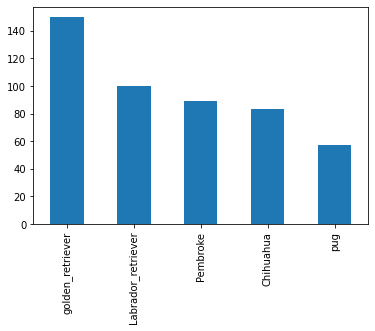

In [354]:
WeRateDogs_Master_df.First_Prediction.value_counts().head().plot(kind='bar')

<AxesSubplot:>

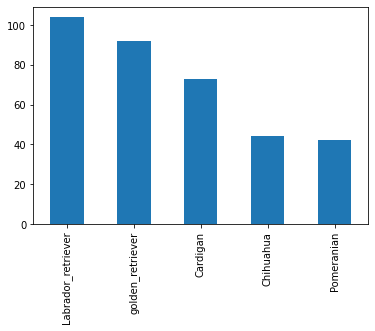

In [355]:
WeRateDogs_Master_df.Second_Prediction.value_counts().head().plot(kind='bar')

<AxesSubplot:>

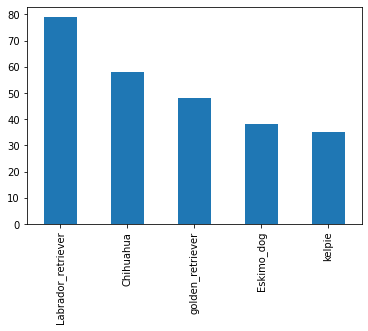

In [356]:
WeRateDogs_Master_df.Third_Prediction.value_counts().head().plot(kind='bar')

## Limitations

- The approval process from twitter takes alot of time
- Incomplete data which led to the extraction and combination of data from different sources

## Reference

- https://www.geeksforgeeks.org/append-to-json-file-using-python/?ref=lbp

- https://www.agiratech.com/install-requests-library-in-python accessed 20/06/2022

- https://www.pythontutorial.net/python-basics/python-read-text-file/#:~:text=To%20read%20a%20text%20file%20in%20Python%2C%20you,the%20file%20using%20the%20file%20close%20%28%29%20method.

- https://www.codespeedy.com/convert-a-dictionary-into-a-list-in-python/#:~:text=using%20list%20%28%29%20function%20to%20convert%20dictionary%20to,%27jagannath%27%2C%20%27class%27%3A%208%2C%20%27id%27%3A%20123%7D%20%5B%27name%27%2C%20%27class%27%2C%20%27id%27%5D

- https://datagy.io/pandas-data-cleaning/